In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [14]:
df = pd.read_csv("advertising.csv")

In [15]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
#Checking for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
#Splitting the dataset
X = df[['Radio']]
y = df['Sales']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(160, 1) (40, 1)


In [19]:
#Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
#Calculating evaluation params
rss = np.sum((y_test-y_pred)**2)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [22]:
#Model params
coefficient = model.coef_[0]
intercept = model.intercept_

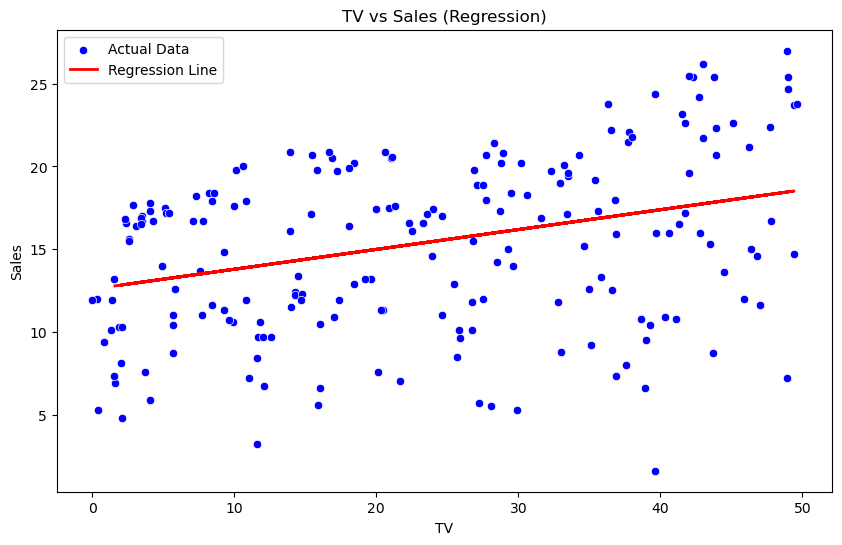

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Radio',y='Sales',data=df,color='blue',label='Actual Data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Regression Line')
plt.title("TV vs Sales (Regression)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()
plt.savefig("linear_regression_4.png")

In [24]:
print("Regression Result: ")
print("Intercept: ",intercept)
print("Coefficient: ",coefficient)
print("RSS: ",rss)
print("MSE: ",mse)
print("Coefficient of Determination (R2): ",r2)

Regression Result: 
Intercept:  12.585523978355143
Coefficient:  0.12000113752716518
RSS:  1103.823277943327
MSE:  27.595581948583174
Coefficient of Determination (R2):  0.10697088619553419
